In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
sklearn.__version__

'1.6.1'

In [4]:

df = pd.read_csv('laptop_data.csv')

In [4]:
df

Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 12 columns]

In [5]:
df.shape

(1303, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [10]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [11]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu Ram               Memory  \
0        Intel Core i5 2.3GHz   8            128GB SSD   
1        Intel Core i5 1.8GHz   8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3        Intel Core i7 2.7GHz  16            512GB SSD   
4        Intel Core i5 3.1GHz   8            256GB SSD   

                            Gpu  OpSys Weight        Price  
0  Intel Iris Plus Graphics 640  macOS   1.37   71378.6832  
1        Intel HD Graphics 6000  macOS   1.34   47895.5232  
2         Intel HD Graphics 620  No OS   1.86   30636.0000  
3            AMD Radeon Pro 455  macOS   1.83  135195.3360  
4  Intel Iris Plus Graphics 650  macOS   1.37   96095.8080

In [12]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [13]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232  
2         Intel HD Graphics 620  No OS    1.86   30636.0000  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<Axes: xlabel='Price', ylabel='Count'>

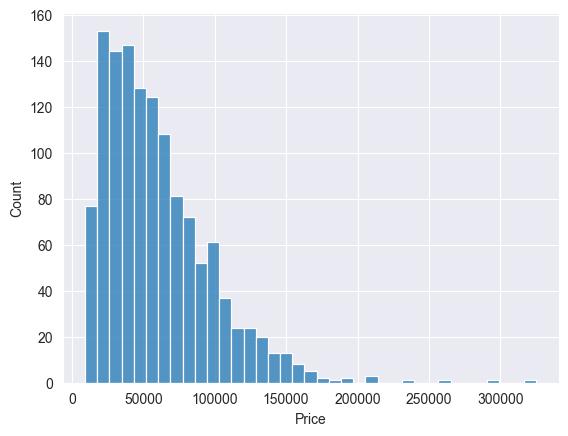

In [20]:
sns.histplot(df['Price'])

<Axes: xlabel='Company'>

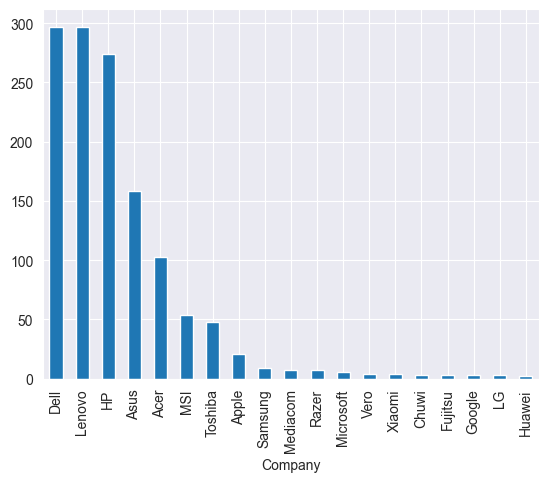

In [22]:
df['Company'].value_counts().plot(kind='bar')

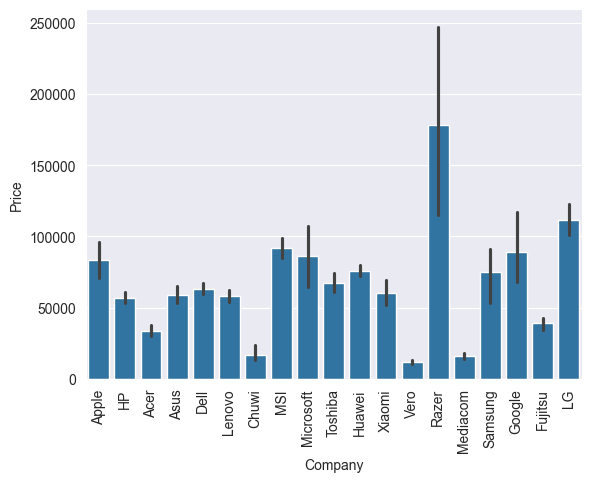

In [23]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

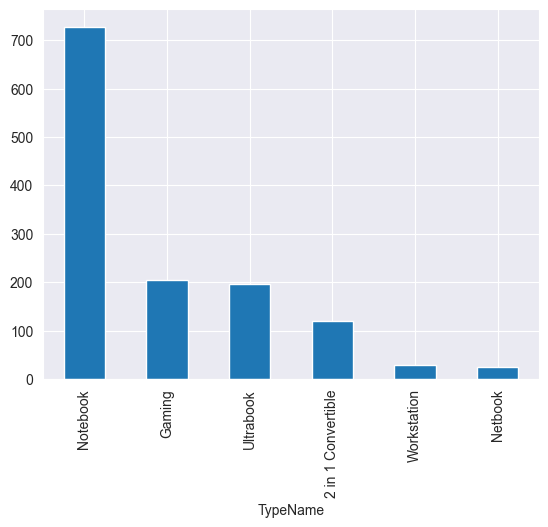

In [24]:
df['TypeName'].value_counts().plot(kind='bar')

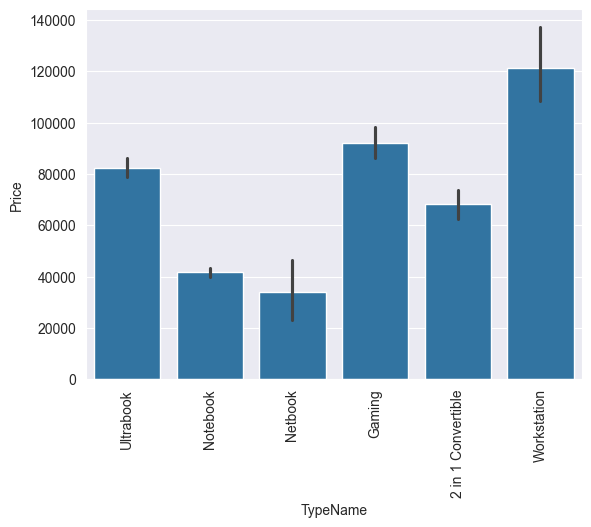

In [25]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Count'>

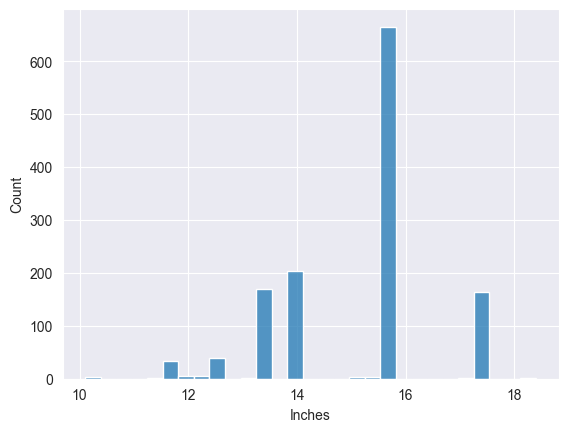

In [26]:
sns.histplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

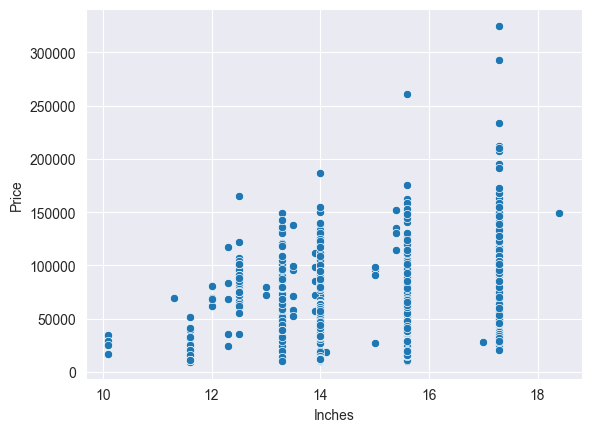

In [27]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [28]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [29]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [30]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0  
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0

<Axes: xlabel='Touchscreen'>

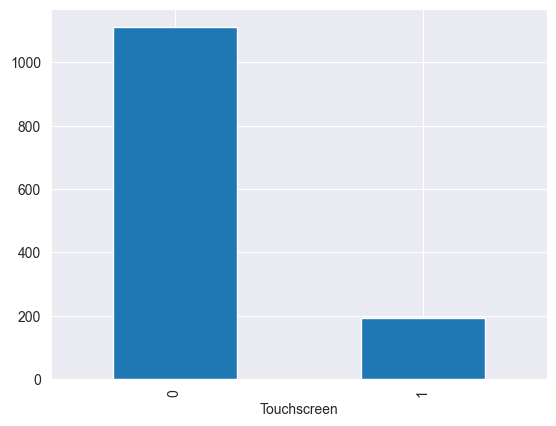

In [31]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

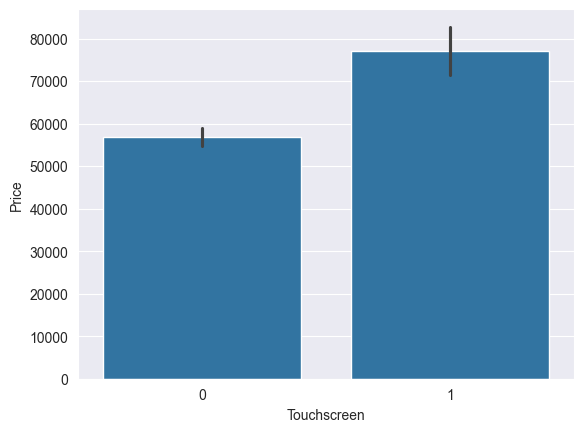

In [32]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [33]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [34]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0  
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1

<Axes: xlabel='Ips'>

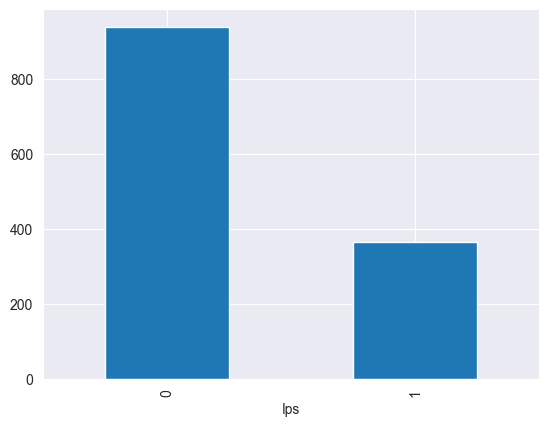

In [35]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

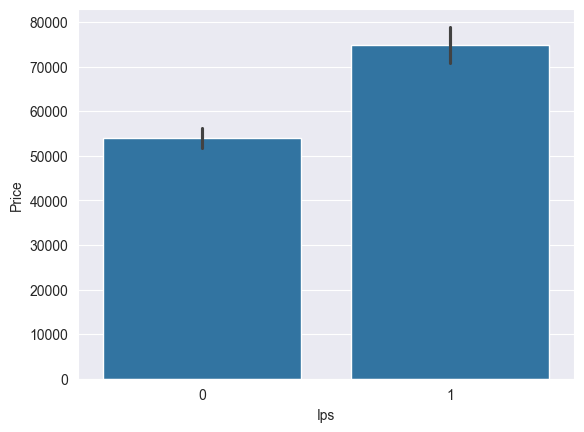

In [36]:
sns.barplot(x=df['Ips'],y=df['Price'])


In [37]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [38]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [39]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [40]:
df.sample(5)

Company            TypeName  Inches                 ScreenResolution  \
1266       HP            Notebook    15.6                Full HD 1920x1080   
303    Lenovo            Notebook    15.6                         1366x768   
1191  Samsung  2 in 1 Convertible    12.3  IPS Panel Touchscreen 2400x1600   
1212      MSI              Gaming    17.3      IPS Panel Full HD 1920x1080   
1215     Acer             Netbook    11.6                         1366x768   

                                       Cpu  Ram                Memory  \
1266             AMD A9-Series 9410 2.9GHz    6          1.0TB Hybrid   
303             Intel Core i5 7200U 2.5GHz    8               2TB HDD   
1191         Samsung Cortex A72&A53 2.0GHz    4    32GB Flash Storage   
1212           Intel Core i7 6700HQ 2.6GHz   16  256GB SSD +  1TB HDD   
1215  Intel Celeron Dual Core 3205U 1.5GHz    2              32GB SSD   

                          Gpu       OpSys  Weight        Price  Touchscreen  \
1266       AMD Radeon R7 M440  Windows 10    2.04   29303.4672            0   
303      Nvidia GeForce 940MX       No OS    2.20   29250.7200            0   
1191        ARM Mali T860 MP4   Chrome OS    1.15   35111.5200            1   
1212  Nvidia GeForce GTX 1060  Windows 10    2.43  103842.1872            0   
1215        Intel HD Graphics   Chrome OS    1.30    9270.7200            0   

      Ips X_res Y_res  
1266    0  1920  1080  
303     0  1366   768  
1191    1  2400  1600  
1212    1  1920  1080  
1215    0  1366   768

In [41]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [42]:
df.corr()['Price']

ValueError: could not convert string to float: 'Apple'

In [43]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [47]:
df.corr()['Price']

ValueError: could not convert string to float: 'Apple'

In [45]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [46]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [48]:
df.sample(5)

Company            TypeName                                   Cpu  Ram  \
1155      HP            Notebook          AMD A6-Series A6-9220 2.5GHz    4   
1165    Dell              Gaming           Intel Core i7 7700HQ 2.8GHz    8   
1231   Razer              Gaming           Intel Core i7 7700HQ 2.8GHz   16   
455     Dell  2 in 1 Convertible  Intel Pentium Quad Core N3710 1.6GHz    4   
1302    Asus            Notebook  Intel Celeron Dual Core N3050 1.6GHz    4   

                    Memory                         Gpu       OpSys  Weight  \
1155             256GB SSD              AMD Radeon 520  Windows 10    1.91   
1165  128GB SSD +  1TB HDD  Nvidia GeForce GTX 1050 Ti  Windows 10    2.62   
1231               1TB SSD     Nvidia GeForce GTX 1060  Windows 10    1.95   
455              500GB HDD       Intel HD Graphics 405  Windows 10    1.47   
1302             500GB HDD           Intel HD Graphics  Windows 10    2.20   

            Price  Touchscreen  Ips         ppi  
1155   25515.2592            0    0  141.211998  
1165   79813.4400            0    0  282.423996  
1231  186426.7200            0    0  157.350512  
455    25521.1200            1    0  135.094211  
1302   19660.3200            0    0  100.454670

In [49]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [51]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [52]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi       Cpu Name  
0  226.983005  Intel Core i5  
1  127.677940  Intel Core i5  
2  141.211998  Intel Core i5  
3  220.534624  Intel Core i7  
4  226.983005  Intel Core i5

In [53]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [54]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [48]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi       Cpu Name      Cpu brand  
0  226.983005  Intel Core i5  Intel Core i5  
1  127.677940  Intel Core i5  Intel Core i5  
2  141.211998  Intel Core i5  Intel Core i5  
3  220.534624  Intel Core i7  Intel Core i7  
4  226.983005  Intel Core i5  Intel Core i5

<Axes: xlabel='Cpu brand'>

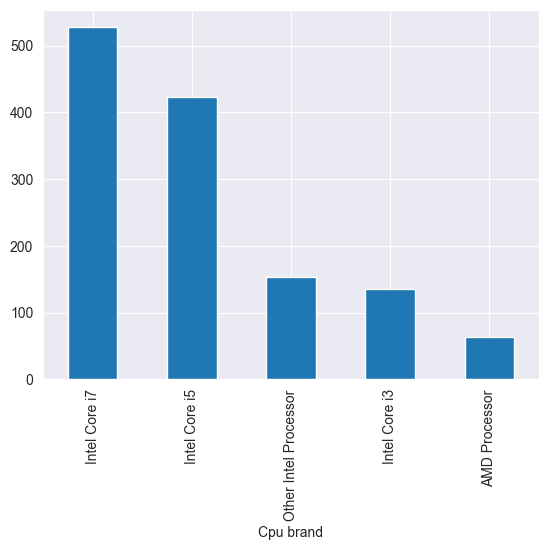

In [55]:
df['Cpu brand'].value_counts().plot(kind='bar')

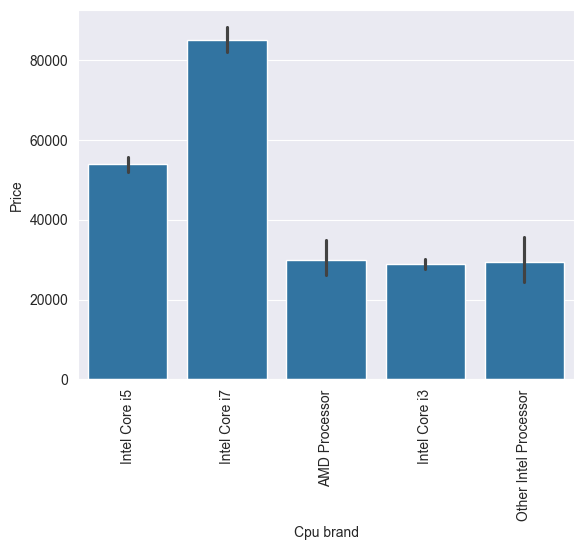

In [56]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi       Cpu Name      Cpu brand  
0  226.983005  Intel Core i5  Intel Core i5  
1  127.677940  Intel Core i5  Intel Core i5  
2  141.211998  Intel Core i5  Intel Core i5  
3  220.534624  Intel Core i7  Intel Core i7  
4  226.983005  Intel Core i5  Intel Core i5

In [58]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [59]:
df.head()

Company   TypeName  Ram               Memory                           Gpu  \
0   Apple  Ultrabook    8            128GB SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128GB Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256GB SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512GB SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256GB SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight        Price  Touchscreen  Ips         ppi      Cpu brand  
0  macOS    1.37   71378.6832            0    1  226.983005  Intel Core i5  
1  macOS    1.34   47895.5232            0    0  127.677940  Intel Core i5  
2  No OS    1.86   30636.0000            0    0  141.211998  Intel Core i5  
3  macOS    1.83  135195.3360            0    1  220.534624  Intel Core i7  
4  macOS    1.37   96095.8080            0    1  226.983005  Intel Core i5

<Axes: xlabel='Ram'>

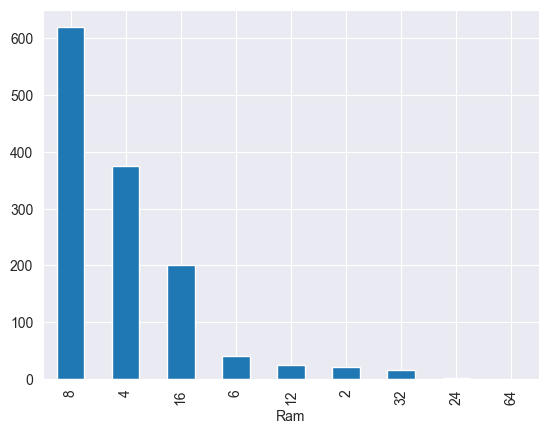

In [60]:
df['Ram'].value_counts().plot(kind='bar')

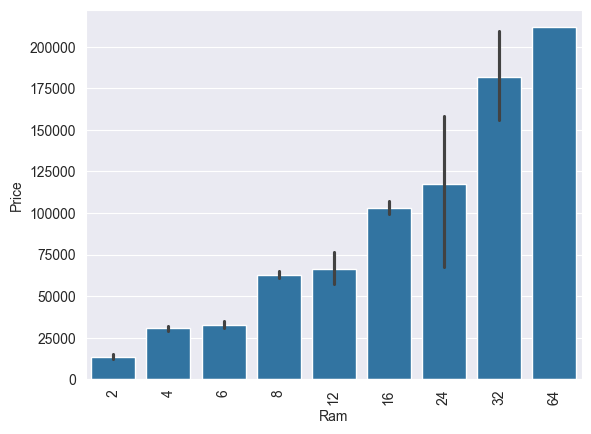

In [61]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [68]:
import pandas as pd
import numpy as np

# Convert Memory column to string and clean up
df["Memory"] = df["Memory"].astype(str).replace(r"\.0$", "", regex=True)
df["Memory"] = df["Memory"].str.replace("GB", "", regex=False)
df["Memory"] = df["Memory"].str.replace("TB", "000", regex=False)

# Split Memory column into two parts if "+" is present
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract values, ensuring proper stripping
df["first"] = new[0].str.strip()
df["second"] = new[1].str.strip().fillna("0")

# Identify storage types using NumPy for efficiency
df["Layer1HDD"] = np.where(df["first"].str.contains("HDD", na=False), 1, 0)
df["Layer1SSD"] = np.where(df["first"].str.contains("SSD", na=False), 1, 0)
df["Layer1Hybrid"] = np.where(df["first"].str.contains("Hybrid", na=False), 1, 0)
df["Layer1Flash_Storage"] = np.where(df["first"].str.contains("Flash Storage", na=False), 1, 0)

# Extract numeric values properly
df["first"] = df["first"].str.extract(r"(\d+)").fillna(0).astype(pd.Int64Dtype())
df["second"] = df["second"].str.extract(r"(\d+)").fillna(0).astype(pd.Int64Dtype())

# Identify storage types in the second storage layer
df["Layer2HDD"] = np.where(df["second"].astype(str).str.contains("HDD", na=False), 1, 0)
df["Layer2SSD"] = np.where(df["second"].astype(str).str.contains("SSD", na=False), 1, 0)
df["Layer2Hybrid"] = np.where(df["second"].astype(str).str.contains("Hybrid", na=False), 1, 0)
df["Layer2Flash_Storage"] = np.where(df["second"].astype(str).str.contains("Flash Storage", na=False), 1, 0)

# Compute total storage capacities
df["HDD"] = (df["first"] * df["Layer1HDD"]) + (df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"]) + (df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"]) + (df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"]) + (df["second"] * df["Layer2Flash_Storage"])

# Drop intermediate columns for a clean dataset
df.drop(columns=["first", "second", "Layer1HDD", "Layer1SSD", "Layer1Hybrid",
                 "Layer1Flash_Storage", "Layer2HDD", "Layer2SSD", "Layer2Hybrid",
                 "Layer2Flash_Storage"], inplace=True)

print(df.head())


  Company   TypeName  Ram             Memory                           Gpu  \
0   Apple  Ultrabook    8            128 SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128 Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256 SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512 SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256 SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight        Price  Touchscreen  Ips         ppi      Cpu brand  \
0  macOS    1.37   71378.6832            0    1  226.983005  Intel Core i5   
1  macOS    1.34   47895.5232            0    0  127.677940  Intel Core i5   
2  No OS    1.86   30636.0000            0    0  141.211998  Intel Core i5   
3  macOS    1.83  135195.3360            0    1  220.534624  Intel Core i7   
4  macOS    1.37   96095.8080            0    1  226.983005  Intel Core i5   

   HDD  SSD  Hybrid  Flash_Storage  
0    0  128       0      

In [69]:
df.head()

Company   TypeName  Ram             Memory                           Gpu  \
0   Apple  Ultrabook    8            128 SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128 Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256 SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512 SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256 SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight        Price  Touchscreen  Ips         ppi      Cpu brand  \
0  macOS    1.37   71378.6832            0    1  226.983005  Intel Core i5   
1  macOS    1.34   47895.5232            0    0  127.677940  Intel Core i5   
2  No OS    1.86   30636.0000            0    0  141.211998  Intel Core i5   
3  macOS    1.83  135195.3360            0    1  220.534624  Intel Core i7   
4  macOS    1.37   96095.8080            0    1  226.983005  Intel Core i5   

   HDD  SSD  Hybrid  Flash_Storage  
0    0  128       0              0  
1    0    0       0            128  
2    0  256       0              0  
3    0  512       0              0  
4    0  256       0              0

In [70]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.corr()['Price']

ValueError: could not convert string to float: 'Apple'

In [72]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [73]:
df.head()

Company   TypeName  Ram                           Gpu  OpSys  Weight  \
0   Apple  Ultrabook    8  Intel Iris Plus Graphics 640  macOS    1.37   
1   Apple  Ultrabook    8        Intel HD Graphics 6000  macOS    1.34   
2      HP   Notebook    8         Intel HD Graphics 620  No OS    1.86   
3   Apple  Ultrabook   16            AMD Radeon Pro 455  macOS    1.83   
4   Apple  Ultrabook    8  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  Ips         ppi      Cpu brand  HDD  SSD  
0   71378.6832            0    1  226.983005  Intel Core i5    0  128  
1   47895.5232            0    0  127.677940  Intel Core i5    0    0  
2   30636.0000            0    0  141.211998  Intel Core i5    0  256  
3  135195.3360            0    1  220.534624  Intel Core i7    0  512  
4   96095.8080            0    1  226.983005  Intel Core i5    0  256

In [74]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [75]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [76]:
df.head()

Company   TypeName  Ram                           Gpu  OpSys  Weight  \
0   Apple  Ultrabook    8  Intel Iris Plus Graphics 640  macOS    1.37   
1   Apple  Ultrabook    8        Intel HD Graphics 6000  macOS    1.34   
2      HP   Notebook    8         Intel HD Graphics 620  No OS    1.86   
3   Apple  Ultrabook   16            AMD Radeon Pro 455  macOS    1.83   
4   Apple  Ultrabook    8  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  Ips         ppi      Cpu brand  HDD  SSD  \
0   71378.6832            0    1  226.983005  Intel Core i5    0  128   
1   47895.5232            0    0  127.677940  Intel Core i5    0    0   
2   30636.0000            0    0  141.211998  Intel Core i5    0  256   
3  135195.3360            0    1  220.534624  Intel Core i7    0  512   
4   96095.8080            0    1  226.983005  Intel Core i5    0  256   

  Gpu brand  
0     Intel  
1     Intel  
2     Intel  
3       AMD  
4     Intel

In [77]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [78]:
df = df[df['Gpu brand'] != 'ARM']

In [ ]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

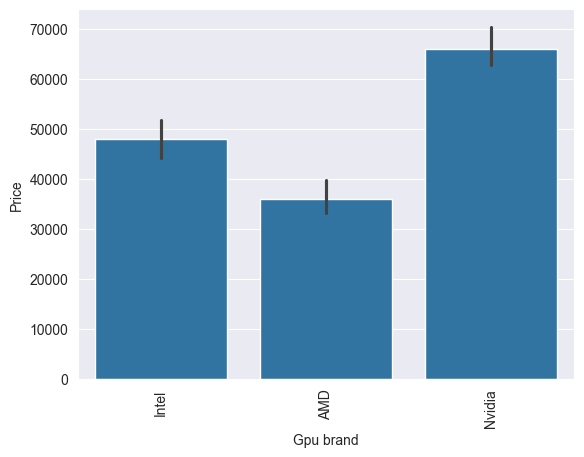

In [80]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [81]:
df.drop(columns=['Gpu'],inplace=True)

C:\Users\devdn\AppData\Local\Temp\ipykernel_11024\1064938564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [82]:
df.head()

Company   TypeName  Ram  OpSys  Weight        Price  Touchscreen  Ips  \
0   Apple  Ultrabook    8  macOS    1.37   71378.6832            0    1   
1   Apple  Ultrabook    8  macOS    1.34   47895.5232            0    0   
2      HP   Notebook    8  No OS    1.86   30636.0000            0    0   
3   Apple  Ultrabook   16  macOS    1.83  135195.3360            0    1   
4   Apple  Ultrabook    8  macOS    1.37   96095.8080            0    1   

          ppi      Cpu brand  HDD  SSD Gpu brand  
0  226.983005  Intel Core i5    0  128     Intel  
1  127.677940  Intel Core i5    0    0     Intel  
2  141.211998  Intel Core i5    0  256     Intel  
3  220.534624  Intel Core i7    0  512       AMD  
4  226.983005  Intel Core i5    0  256     Intel

In [83]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

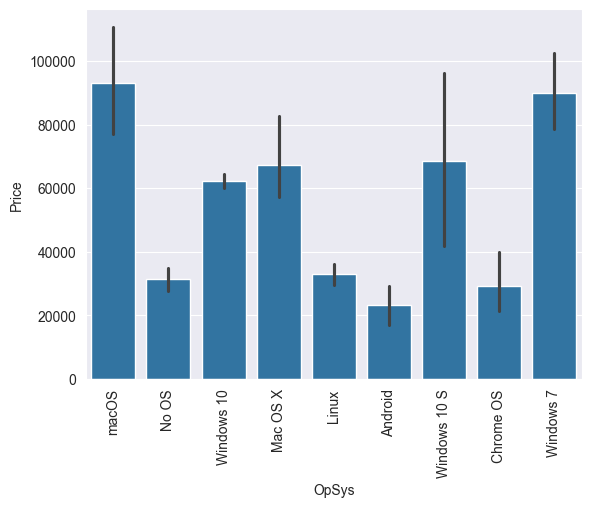

In [84]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [85]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [86]:
df['os'] = df['OpSys'].apply(cat_os)

C:\Users\devdn\AppData\Local\Temp\ipykernel_11024\323735098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [87]:
df.head()

Company   TypeName  Ram  OpSys  Weight        Price  Touchscreen  Ips  \
0   Apple  Ultrabook    8  macOS    1.37   71378.6832            0    1   
1   Apple  Ultrabook    8  macOS    1.34   47895.5232            0    0   
2      HP   Notebook    8  No OS    1.86   30636.0000            0    0   
3   Apple  Ultrabook   16  macOS    1.83  135195.3360            0    1   
4   Apple  Ultrabook    8  macOS    1.37   96095.8080            0    1   

          ppi      Cpu brand  HDD  SSD Gpu brand                  os  
0  226.983005  Intel Core i5    0  128     Intel                 Mac  
1  127.677940  Intel Core i5    0    0     Intel                 Mac  
2  141.211998  Intel Core i5    0  256     Intel  Others/No OS/Linux  
3  220.534624  Intel Core i7    0  512       AMD                 Mac  
4  226.983005  Intel Core i5    0  256     Intel                 Mac

In [88]:
df.drop(columns=['OpSys'],inplace=True)

C:\Users\devdn\AppData\Local\Temp\ipykernel_11024\667349797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


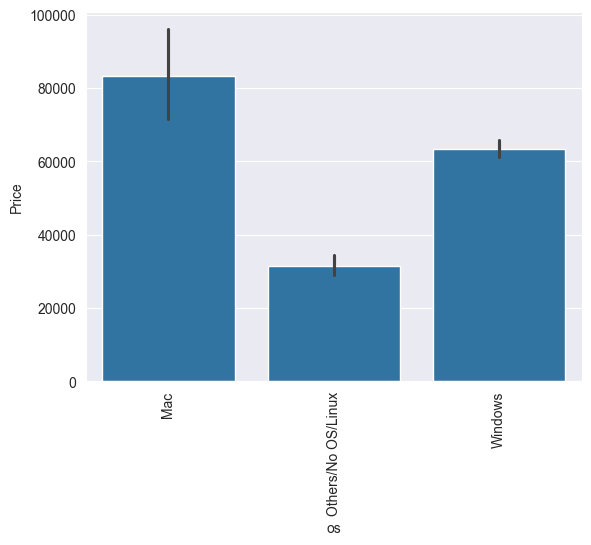

In [89]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Count'>

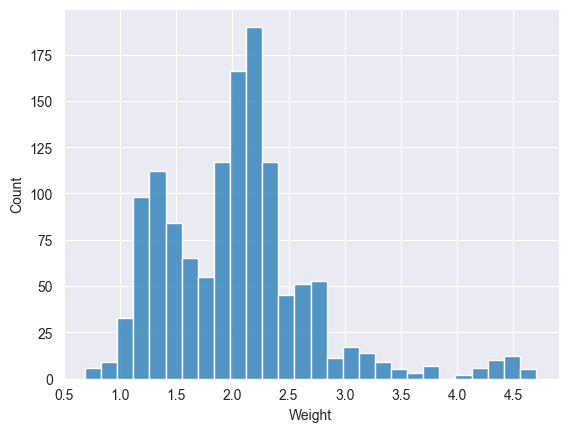

In [90]:
sns.histplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

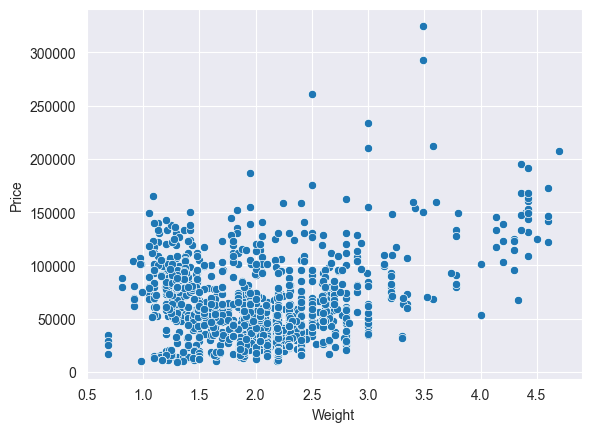

In [91]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df.corr()['Price']

ValueError: could not convert string to float: 'Apple'

In [94]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Apple'

<Axes: xlabel='Price', ylabel='Count'>

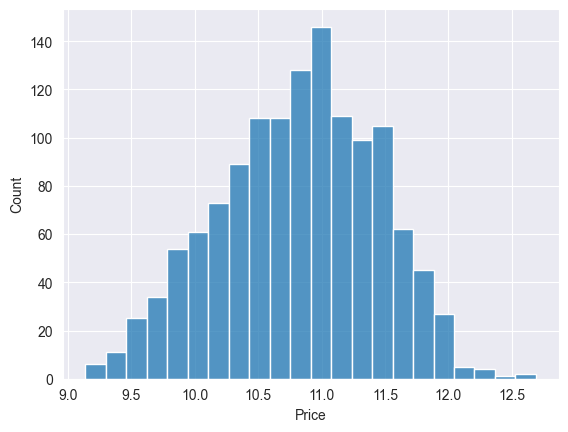

In [96]:
sns.histplot(np.log(df['Price']))

In [97]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [98]:
X

Company            TypeName  Ram  Weight  Touchscreen  Ips         ppi  \
0      Apple           Ultrabook    8    1.37            0    1  226.983005   
1      Apple           Ultrabook    8    1.34            0    0  127.677940   
2         HP            Notebook    8    1.86            0    0  141.211998   
3      Apple           Ultrabook   16    1.83            0    1  220.534624   
4      Apple           Ultrabook    8    1.37            0    1  226.983005   
...      ...                 ...  ...     ...          ...  ...         ...   
1298  Lenovo  2 in 1 Convertible    4    1.80            1    1  157.350512   
1299  Lenovo  2 in 1 Convertible   16    1.30            1    1  276.053530   
1300  Lenovo            Notebook    2    1.50            0    0  111.935204   
1301      HP            Notebook    6    2.19            0    0  100.454670   
1302    Asus            Notebook    4    2.20            0    0  100.454670   

                  Cpu brand   HDD  SSD Gpu brand                  os  
0             Intel Core i5     0  128     Intel                 Mac  
1             Intel Core i5     0    0     Intel                 Mac  
2             Intel Core i5     0  256     Intel  Others/No OS/Linux  
3             Intel Core i7     0  512       AMD                 Mac  
4             Intel Core i5     0  256     Intel                 Mac  
...                     ...   ...  ...       ...                 ...  
1298          Intel Core i7     0  128     Intel             Windows  
1299          Intel Core i7     0  512     Intel             Windows  
1300  Other Intel Processor     0    0     Intel             Windows  
1301          Intel Core i7  1000    0       AMD             Windows  
1302  Other Intel Processor   500    0     Intel             Windows  

[1302 rows x 12 columns]

In [99]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [102]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [106]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8102205193026754
MAE 0.20853563263045266


In [107]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8144791052835674
MAE 0.20809088617562083


In [109]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8099725125831074
MAE 0.2098023216382015


In [110]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8144773502274107
MAE 0.19192251548632577


In [111]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8462262016062322
MAE 0.18202259732788256


In [112]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8292909871497534
MAE 0.19665434921973507


In [113]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.886221636211098
MAE 0.15902003800426082


In [114]:
X_test

Company            TypeName  Ram  Weight  Touchscreen  Ips         ppi  \
248       HP            Notebook    4    1.49            0    1  165.632118   
555     Asus            Notebook    4    2.00            0    0  100.454670   
1251      HP            Notebook    4    1.86            0    0  100.454670   
547   Lenovo            Notebook    4    2.15            0    0  141.211998   
885       HP  2 in 1 Convertible    4    1.28            1    0  165.632118   
...      ...                 ...  ...     ...          ...  ...         ...   
1129      HP              Gaming    8    3.35            0    1  127.335675   
172   Lenovo            Notebook    4    2.20            0    0  100.454670   
322     Asus            Notebook    8    2.00            0    0  157.350512   
996       HP           Ultrabook    8    1.11            1    1  165.632118   
470       HP  2 in 1 Convertible    8    1.29            1    1  331.264236   

                  Cpu brand   HDD  SSD Gpu brand                  os  
248           Intel Core i5   500    0     Intel             Windows  
555   Other Intel Processor   500    0     Intel  Others/No OS/Linux  
1251          AMD Processor   500    0       AMD             Windows  
547           Intel Core i5  1000    0     Intel  Others/No OS/Linux  
885           Intel Core i5     0  256     Intel             Windows  
...                     ...   ...  ...       ...                 ...  
1129          Intel Core i5     0  128    Nvidia             Windows  
172           AMD Processor   500    0       AMD  Others/No OS/Linux  
322           Intel Core i7     0  256     Intel             Windows  
996           Intel Core i7     0  256     Intel             Windows  
470           Intel Core i7     0  512     Intel             Windows  

[196 rows x 12 columns]

In [116]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              bootstrap=True,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8861911079437549
MAE 0.16029072636777858


In [117]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7957981986938747
MAE 0.22773053309534996


In [118]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8813796695878755
MAE 0.15775763638790632


In [119]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8792682793826343
MAE 0.1609243667976647


In [120]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8901340791678345
MAE 0.1576813661827201


In [121]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8793069768214947
MAE 0.1661040505967345


In [122]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.886221636211098
MAE 0.15902003800426082


In [123]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [124]:
query = np.array(['Asus','Notebook','8' ,'1.7' ,'0','1' ,'141.21199808219862','Intel Core i7' ,'0' ,'512','Intel','Windows'])
query = query.reshape(1, 12)
query

array([['Asus', 'Notebook', '8', '1.7', '0', '1', '141.21199808219862',
        'Intel Core i7', '0', '512', 'Intel', 'Windows']], dtype='<U18')

In [125]:
np.exp(pipe.predict(query))

C:\Users\devdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([69454.65472226])